# $LAB 9$ $TASK 1$

调库

In [103]:
import pandas as pd
import numpy as np
import math
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

导入数据并降维

In [104]:
filename = 'E:/大学课程/AI程序设计/实验部分/实验9 聚类-关联-异常/实验课聚类关联分析/house-votes-84.csv'
data_origin = pd.read_csv(filename, engine = 'python')

导入数据-$Dataframe$格式

In [105]:
data_origin_matrix = data_origin.values
label_lst = []
for item in data_origin_matrix:
    if item[0]=='republican':
        label_lst.append(0)#共和党为0
    else:
        label_lst.append(1)#民主党为1

把原始的标签提取出来

In [106]:
data_product=data_origin.drop('A',axis=1)
data_product_matrix = data_product.values
pri_X = data_product_matrix

lst_extern = []

for item in pri_X:
    lst_essen = []
    for member in item:
        if member == 'n':
            lst_essen.append(-1)
        elif member == 'y':
            lst_essen.append(1)
        else:
            lst_essen.append(0)
    lst_extern.append(lst_essen)

X = np.mat(lst_extern)

把投票结果‘$n$’，‘$y$’，‘$？$’，分别用$-1$，$1$，$0$代替

In [107]:
pca = PCA(n_components = 2)
reduced_X = pca.fit_transform(X)

X_lst = []
Y_lst = []

for item in reduced_X:
    X_lst.append(item[0])
    Y_lst.append(item[1])

数据降维，降成$3$维

In [108]:
clf = KMeans(n_clusters=2)
y_pred = clf.fit_predict(reduced_X)

利用$Sklearn$中的$cluster$进行聚类

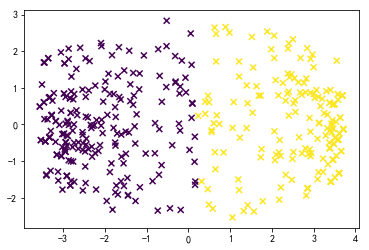

In [109]:
ax = plt.figure().add_subplot(111)
ax.scatter(X_lst,Y_lst, c=y_pred,marker='x')

利用$matplotlib$把聚类结果可视化

In [110]:
republic_x = []
republic_y = []

democrate_x = []
democrate_y = []

republic_x_pred = []
republic_y_pred = []

democrate_x_pred = []
democrate_y_pred = []

for i in range(435):
    if label_lst[i] == 0:
        republic_x.append(reduced_X[i][0])
        republic_y.append(reduced_X[i][1])
    else:
        democrate_x.append(reduced_X[i][0])
        democrate_y.append(reduced_X[i][1])

for i in range(435):
    if y_pred[i] == 0:
        republic_x_pred.append(reduced_X[i][0])
        republic_y_pred.append(reduced_X[i][1])
    else:
        democrate_x_pred.append(reduced_X[i][0])
        democrate_y_pred.append(reduced_X[i][1])
        
        

绘制原来真实的类别图

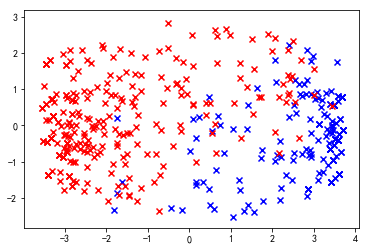

In [111]:
ax = plt.figure().add_subplot(111)
ax.scatter(republic_x,republic_y,c='blue',marker='x')
ax.scatter(democrate_x,democrate_y,c='red',marker='x')

下面尝试对该聚类结果进行评估

首先找到两个聚类的中心

In [112]:
centroids=clf.cluster_centers_

定义平面上两点求距离的函数

In [113]:
def dist(M,N):
    distance = math.sqrt((pow(M[0]-N[0],2)+pow(M[1]-N[1],2)))
    return distance

下面寻求$avg$（$C$）

In [114]:
C_republic = len(republic_x_pred)#199
print(C_republic)
C_democrate = len(democrate_x_pred)#236
print(C_democrate)

236
199


In [115]:
republic_coordinate_set = []
for i in range(C_republic):
    single_coordinate = []
    single_coordinate.append(republic_x_pred[i])
    single_coordinate.append(republic_y_pred[i])
    republic_coordinate_set.append(single_coordinate)
    
democrate_coordinate_set = []
for i in range(C_democrate):
    single_coordinate = []
    single_coordinate.append(democrate_x_pred[i])
    single_coordinate.append(democrate_y_pred[i])
    democrate_coordinate_set.append(single_coordinate)

sum_distance_republic = 0
for i in range(C_republic):
    for j in range(C_republic):
        if j>i:
            sum_distance_republic=sum_distance_republic+dist(republic_coordinate_set[i],republic_coordinate_set[j])
avg_republic_C = 2/((C_republic-1)*C_republic)*sum_distance_republic

sum_distance_democrate = 0
for i in range(C_democrate):
    for j in range(C_democrate):
        if j>i:
            sum_distance_democrate=sum_distance_democrate+dist(democrate_coordinate_set[i],democrate_coordinate_set[j])
avg_democrate_C = 2/((C_democrate-1)*C_democrate)*sum_distance_democrate


聚类得到的共和党派的$avg(c)$为$1.8949841881585363$

聚类得到的民主党派的$avg(c)$为$1.9125389919760962$

下面求$diam$（$C$）

In [116]:
republic_distance_max = 0
for i in range(C_republic):
    for j in range(C_republic):
        if j>i:
            if dist(republic_coordinate_set[i],republic_coordinate_set[j]) > republic_distance_max:
                republic_distance_max = dist(republic_coordinate_set[i],republic_coordinate_set[j])
                
democrate_distance_max = 0
for i in range(C_democrate):
    for j in range(C_democrate):
        if j>i:
            if dist(democrate_coordinate_set[i],democrate_coordinate_set[j]) > democrate_distance_max:
                democrate_distance_max = dist(democrate_coordinate_set[i],democrate_coordinate_set[j])
                

聚类得到的共和党派的$diam(c)$为$5.198664619227401$

聚类得到的民主党派的$diam(c)$为$5.315512164657216$

下面求$d_{min}$$(C_i,C_j)$

In [117]:
distance_between_clusters = 200
for i in range(C_republic):
    for j in range(C_democrate):
        if dist(republic_coordinate_set[i],democrate_coordinate_set[j]) < distance_between_clusters:
            distance_between_clusters = dist(republic_coordinate_set[i],democrate_coordinate_set[j])    

两个聚类的簇内最近的两个样本的距离为：$0.15248405503877316$

下面求$d_{cen}$$(C_i,C_j)$

In [118]:
distance_between_two_centers = dist(centroids[0],centroids[1])

两个簇的中心点的距离为$4.851762143635815$

# $LAB9$ $TASK3$

## 异常检测

调库

In [119]:
import pandas as pd
import numpy as np
import math
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

导入文件

In [132]:
filename = 'E:/大学课程/AI程序设计/实验部分/实验9 聚类-关联-异常/实验课聚类关联分析/house-votes-84.csv'
data_origin = pd.read_csv(filename, engine = 'python')
k = 2
threshold = 2.5
iteration = 500

把原始标签提取出来

In [133]:
data_origin_matrix = data_origin.values
label_lst = []
for item in data_origin_matrix:
    if item[0]=='republican':
        label_lst.append(0)#共和党为0
    else:
        label_lst.append(1)#民主党为1

把投票结果‘$n$’，‘$y$’，‘$？$’，分别用$-1$，$1$，$0$代替

In [134]:
data_product=data_origin.drop('A',axis=1)
data_product_matrix = data_product.values
pri_X = data_product_matrix

lst_extern = []

for item in pri_X:
    lst_essen = []
    for member in item:
        if member == 'n':
            lst_essen.append(-1)
        elif member == 'y':
            lst_essen.append(1)
        else:
            lst_essen.append(0)
    lst_extern.append(lst_essen)

X = np.mat(lst_extern)

降维为$2$维

In [135]:
pca = PCA(n_components = 2)
reduced_X = pca.fit_transform(X)

X_lst = []
Y_lst = []

for item in reduced_X:
    X_lst.append(item[0])
    Y_lst.append(item[1])

做离群点检测————整体检测

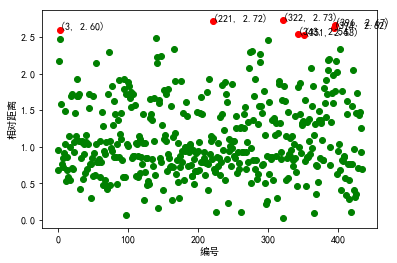

In [136]:
lst1 = []
lst2 = []
for item in reduced_X:
    lst1.append(item[0])
    lst2.append(item[1])

data = np.array(reduced_X)
DF = pd.DataFrame(data,index = range(435))

clf = KMeans(n_clusters=2)
model = KMeans(n_clusters = k, max_iter  = iteration)
data_fit = model.fit(DF)
y_pred = clf.fit_predict(reduced_X)

DF_result = pd.concat([DF, pd.Series(model.labels_, index = DF.index)], axis = 1)  #每个样本对应的类别
DF_result.columns = list(DF.columns) + [u'聚类类别'] #重命名表头

DF_norm = []
for i in range(2):
    norm_tmp = DF_result[[0,1]][DF_result['聚类类别']==i]-model.cluster_centers_[i]
    norm_tmp = norm_tmp.apply(np.linalg.norm,axis = 1)
    DF_norm.append(norm_tmp/norm_tmp.median())

DF_norm = pd.concat(DF_norm)

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
DF_norm[DF_norm <= threshold].plot(style = 'go') #正常点

discrete_points = DF_norm[DF_norm > threshold] #离群点
discrete_points.plot(style = 'ro')


for i in range(len(discrete_points)): #离群点做标记
    id = discrete_points.index[i]
    n = discrete_points.iloc[i]
    plt.annotate('(%s, %0.2f)'%(id, n), xy = (id, n), xytext = (id, n))


plt.xlabel('编号')
plt.ylabel('相对距离')
plt.show()

离群点检测————共和党检测

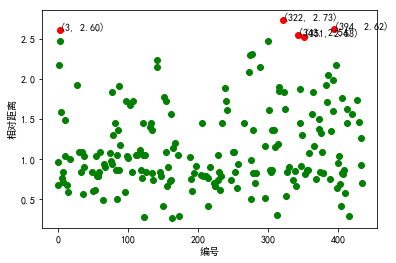

In [137]:
DF_norm_0 = []
for i in range(1):
    norm_tmp = DF_result[[0,1]][DF_result['聚类类别']==i]-model.cluster_centers_[i]
    norm_tmp = norm_tmp.apply(np.linalg.norm,axis = 1)
    DF_norm_0.append(norm_tmp/norm_tmp.median())

DF_norm_0 = pd.concat(DF_norm_0)

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
DF_norm_0[DF_norm_0 <= threshold].plot(style = 'go') #正常点

discrete_points = DF_norm_0[DF_norm_0 > threshold] #离群点
discrete_points.plot(style = 'ro')


for i in range(len(discrete_points)): #离群点做标记
    id = discrete_points.index[i]
    n = discrete_points.iloc[i]
    plt.annotate('(%s, %0.2f)'%(id, n), xy = (id, n), xytext = (id, n))


plt.xlabel('编号')
plt.ylabel('相对距离')
plt.show()

离群点检测————民主党检测

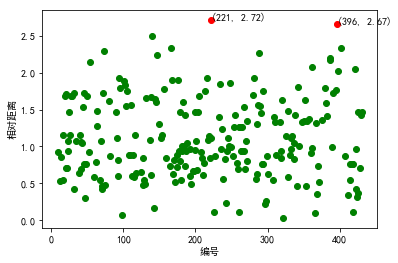

In [138]:
DF_norm_1 = []
for i in range(1,2):
    norm_tmp = DF_result[[0,1]][DF_result['聚类类别']==i]-model.cluster_centers_[i]
    norm_tmp = norm_tmp.apply(np.linalg.norm,axis = 1)
    DF_norm_1.append(norm_tmp/norm_tmp.median())

DF_norm_1 = pd.concat(DF_norm_1)

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
DF_norm_1[DF_norm_1 <= threshold].plot(style = 'go') #正常点

discrete_points = DF_norm_1[DF_norm_1 > threshold] #离群点
discrete_points.plot(style = 'ro')


for i in range(len(discrete_points)): #离群点做标记
    id = discrete_points.index[i]
    n = discrete_points.iloc[i]
    plt.annotate('(%s, %0.2f)'%(id, n), xy = (id, n), xytext = (id, n))


plt.xlabel('编号')
plt.ylabel('相对距离')
plt.show()